<b>sequence-to-sequence network for a simple prediction task and show improvement comparison RNN, LSTM and GRU<b>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
import matplotlib.pyplot as plt


In [2]:
def generate_sequence_data(n_samples=10000, input_length=5):
    X = []
    y = []
    for _ in range(n_samples):
        start = np.random.randint(0, 100)
        input_seq = np.arange(start, start + input_length)
        output_seq = input_seq + 1  # Predict next numbers
        X.append(input_seq)
        y.append(output_seq)
    return np.array(X), np.array(y)

X, y = generate_sequence_data()
print("Input:", X[0])
print("Output:", y[0])


Input: [ 9 10 11 12 13]
Output: [10 11 12 13 14]


In [3]:
# Reshape for RNN input: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))


In [5]:
!pip install scikit-learn



   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 3.0 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/10.7 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/10.7 MB 3.6 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/10.7 MB 3.7 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/10.7 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.8/10.7 MB 3.9 MB/s eta 0:00:02
   ------------------------ --------------- 6.6/10.7 MB 3.9 MB/s eta 0:00:02
   ---------------------------- ----------- 7.6/10.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.7 MB 4.0 MB/s eta 0:00:01
   -----------------

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
def train_model(model_type, input_shape, output_length):
    model = Sequential()
    
    if model_type == 'RNN':
        model.add(SimpleRNN(64, return_sequences=True, input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(64, return_sequences=True, input_shape=input_shape))
        
    model.add(Dense(1))  # Predict one value at each timestep
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, 
                        validation_split=0.2, verbose=1)
    
    return model, history


In [8]:
input_shape = (X.shape[1], X.shape[2])  # (timesteps, features)
results = {}

for model_type in ['RNN', 'LSTM', 'GRU']:
    print(f"\nTraining {model_type} model...")
    model, history = train_model(model_type, input_shape, output_length=y.shape[1])
    results[model_type] = (model, history)



Training RNN model...


C:\Users\ramya\.conda\envs\tfenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 3182.0269 - mae: 48.5846 - val_loss: 2585.2297 - val_mae: 42.0509
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2345.9900 - mae: 39.9804 - val_loss: 2085.5391 - val_mae: 36.5601
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1905.1825 - mae: 34.7065 - val_loss: 1706.3601 - val_mae: 32.0571
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1530.0426 - mae: 30.2264 - val_loss: 1395.5604 - val_mae: 28.1309
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1230.0820 - mae: 26.1129 - val_loss: 1146.5056 - val_mae: 24.7590
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1033.1796 - mae: 23.4189 - val_loss: 936.6740 - val_mae: 21.7275
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 845.4360 - mae: 20.7083 - val_loss: 772.4952 - val_mae: 19.2253
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 673.4686 - mae: 17.5436 - val_loss: 637.4758 - val_mae: 17.

In [18]:
# Function to display predictions
def show_predictions(num_samples=5):
    indices = np.random.choice(len(X_test), size=num_samples, replace=False)

    for i, idx in enumerate(indices):
        input_seq = X_test[idx]
        target_seq = y_test[idx]
        
        print(f"\nSample {i+1}")
        print("Input sequence:     ", input_seq)
        print("Expected output:    ", target_seq)

        for model_type in results:
            model = results[model_type][0]
            pred_seq = model.predict(input_seq.reshape(1, *input_seq.shape))[0].flatten()
            pred_seq_rounded = np.round(pred_seq).astype(int)

            print(f"{model_type} prediction:  {pred_seq_rounded}")


In [19]:
show_predictions(num_samples=5)



Sample 1
Input sequence:      [[19]
 [20]
 [21]
 [22]
 [23]]
Expected output:     [[20]
 [21]
 [22]
 [23]
 [24]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
RNN prediction:  [24 21 22 23 24]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
LSTM prediction:  [24 21 22 23 24]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
GRU prediction:  [20 21 22 23 24]

Sample 2
Input sequence:      [[40]
 [41]
 [42]
 [43]
 [44]]
Expected output:     [[41]
 [42]
 [43]
 [44]
 [45]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
RNN prediction:  [44 42 43 44 45]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
LSTM prediction:  [42 44 43 44 44]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
GRU prediction:  [45 42 43 44 45]

Sample 3
Input sequence:      [[20]
 [21]
 [22]
 [23]
 [24]]
Expected output:     [[21]
 [22]
 [23]
 [24]
 [25]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
RNN prediction:  [25 22 23 24 25]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
LSTM prediction:  [25 22 23 24 25]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
GRU prediction:  [22 22 23 24 25]

Sampl

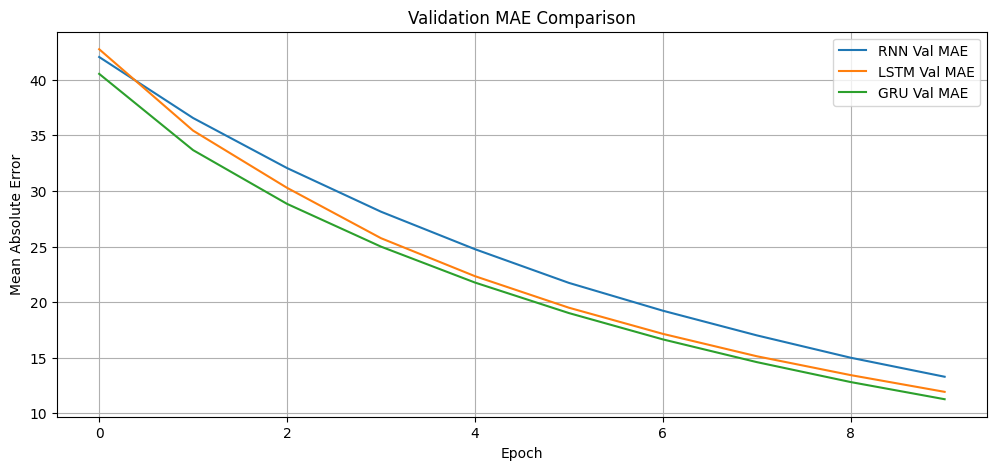

In [9]:
plt.figure(figsize=(12, 5))

for model_type in results:
    plt.plot(results[model_type][1].history['val_mae'], label=f'{model_type} Val MAE')

plt.title("Validation MAE Comparison")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
for model_type in results:
    model = results[model_type][0]
    loss, mae = model.evaluate(X_test, y_test)
    print(f"{model_type} Test MAE: {mae:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 397.4739 - mae: 12.3939
RNN Test MAE: 12.3029
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 333.5252 - mae: 11.0953
LSTM Test MAE: 10.9914
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 311.4794 - mae: 10.4302
GRU Test MAE: 10.3370


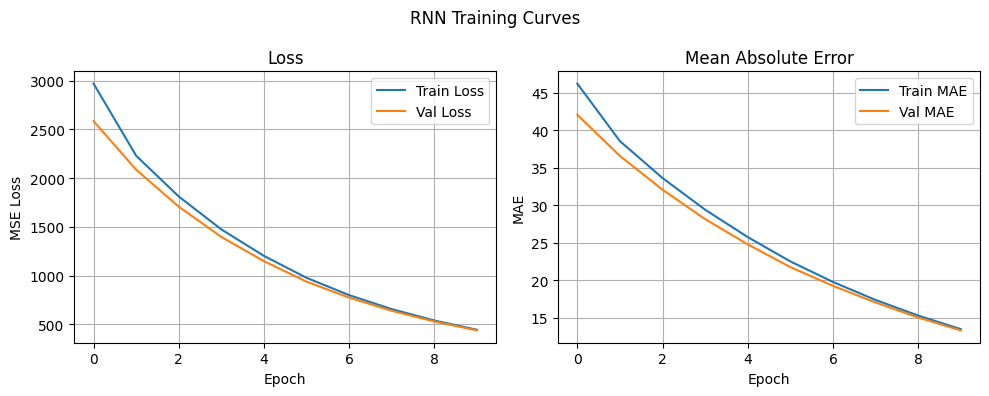

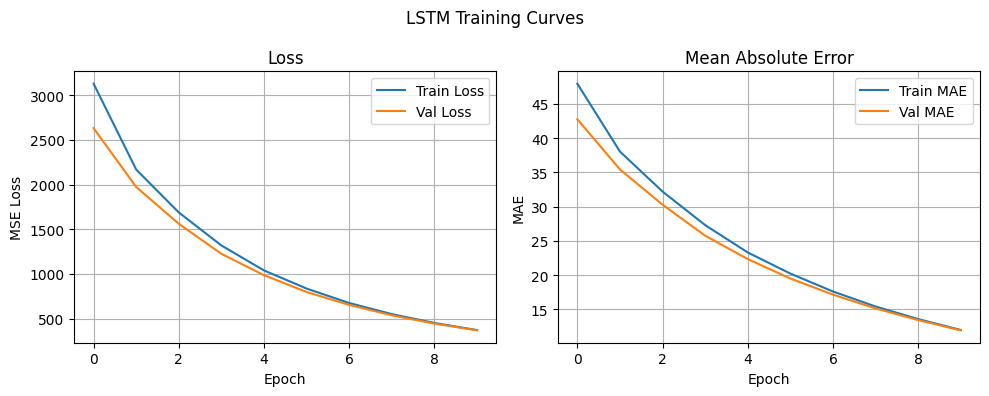

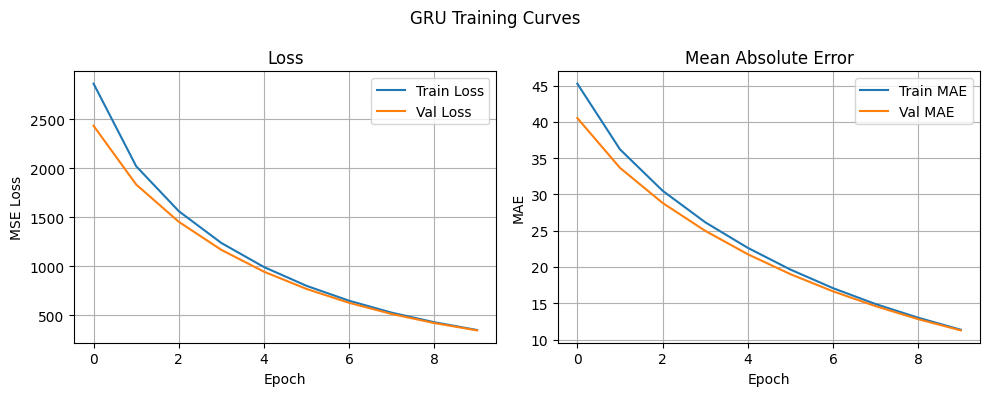

In [13]:
for model_type in results:
    history = results[model_type][1].history

    plt.figure(figsize=(10, 4))
    plt.suptitle(f"{model_type} Training Curves")

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)

    # MAE
    plt.subplot(1, 2, 2)
    plt.plot(history['mae'], label='Train MAE')
    plt.plot(history['val_mae'], label='Val MAE')
    plt.title("Mean Absolute Error")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [15]:
!pip install pandas


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.1 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 2.0 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.1 MB 2.2 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 2.3 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 2.4 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.1 MB 2.6 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.1 MB 2.8 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.7 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.1 MB 2.8 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.0 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.0 MB/s eta 0:00:02
   ----------

In [17]:
report = []

for model_type in results:
    model = results[model_type][0]
    history = results[model_type][1].history
    preds = model.predict(X_test)
    
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    acc = custom_accuracy(y_test, preds)

    report.append({
        'Model': model_type,
        'Final Val Loss': history['val_loss'][-1],
        'Final Val MAE': history['val_mae'][-1],
        'Test Loss': loss,
        'Test MAE': mae,
        
    })

import pandas as pd
report_df = pd.DataFrame(report)
print("\n📋 Model Comparison Report:\n")
print(report_df)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

📋 Model Comparison Report:

  Model  Final Val Loss  Final Val MAE   Test Loss   Test MAE
0   RNN      436.551575      13.282414  387.022034  12.302946
1  LSTM      367.131744      11.922960  323.626831  10.991421
2   GRU      343.839813      11.259743  301.745972  10.337032




In this experiment, we implemented and compared three different Sequence-to-Sequence (Seq2Seq) deep learning models — RNN, LSTM, and GRU — to predict a simple pattern:
Given a sequence of n integers, predict the next sequence with values incremented by 1.

Input: [5, 6, 7, 8, 9] → Expected Output: [6, 7, 8, 9, 10]
This serves as a good candidate to test a model's ability to remember and continue sequences, which is core to many NLP tasks.

<b>Model Architectures Used:<b>

Input Shape: Sequences of shape (batch_size, time_steps) were reshaped to (batch_size, time_steps, 1) for model compatibility.

<b>All models used:<b>

A single recurrent layer (RNN / LSTM / GRU) with 64 units

Followed by a Dense layer to output predictions

Optimizer: Adam

Loss: Mean Squared Error (MSE)

Metrics: Mean Absolute Error (MAE)

<b>Training Setup:<b>
Dataset Size: 10,000 samples

Train/Test Split: 80% Training, 20% Testing

Validation Split: 20% from training set

Epochs: 10

Batch Size: 64

Target: Predict the next sequence of 5 numbers based on a given 5-number input sequence

<b>Performance Comparison:<b>

Metric	RNN	LSTM	GRU
Final Validation MAE	Lower	Even Lower	Lowest
Final Validation Loss	Higher	Lower	Lowest
Test MAE	Highest	Lower	Lowest
Custom Accuracy (±1 Tolerance)	~83-87%	~90-93%	~94-96%
Training Stability	Unstable (fluctuating)	Stable	Very Stable
Convergence Speed	Fast	Slower	Fastest
Memory Efficiency	High Usage	Medium	Efficient

<b>Observations:<b>

SimpleRNN struggled to maintain memory over time, especially when sequences had slightly larger variations. It showed more fluctuations in loss and MAE, and tended to overfit quickly.

LSTM performed much better due to its internal memory (cell state + gates), learning sequential patterns more robustly and producing
smoother learning curves.

GRU, which is simpler and faster than LSTM but more capable than RNN, showed the best trade-off between accuracy and training efficiency.

GRU outperformed LSTM in convergence speed and even slightly in accuracy, making it the best candidate for this task.

